In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import warnings

In [3]:
data = pd.read_csv('train.csv')
data

,id,Genero,Idade,Peso,Raca,Fonte de admisscao,Admissao,Atendimento,Tempo de internacao,Alta hospitalar,...,Medicamento 17,Medicamento 18,Medicamento 19,Medicamento 20,Medicamento 21,Medicamento 22,Medicamento 23,Mudanca de medicamento,Algum medicamento,Readmissao
0,24080,Masculino,90,NaN,Caucasiano,NaN,NaN,NaN,3,Enfermaria,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim,Nao
1,98080,Masculino,60,NaN,Caucasiano,Emergencia,Emergencia,Clinica Medica/Familiar,7,Tratamento domiciliar,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Sim,+30
2,6238,Masculino,70,NaN,Afroamericano,Emergencia,Emergencia,NaN,5,Casa,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Nao,+30
3,72209,Feminino,60,NaN,Caucasiano,Transferencia de hospital,Urgencia,Cardiologia,3,Casa,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim,Nao
4,33076,Feminino,40,NaN,Caucasiano,Emergencia,Emergencia,NaN,4,Casa,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Nao,+30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81407,6266,Feminino,60,NaN,Caucasiano,Emergencia,NaN,Medicina Interna,11,-,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim,+30
81408,54887,Feminino,70,NaN,Caucasiano,Encaminhamento medico,Emergencia,Clinica Medica/Familiar,4,Enfermaria,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim,-30
81409,76821,Masculino,70,NaN,Caucasiano,Emergencia,Urgencia,Clinica Medica/Familiar,5,Casa,...,Dose mantida,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Sim,Sim,+30
81410,861,Masculino,60,NaN,Afroamericano,Encaminhamento medico,Urgencia,Cirurgia-Vascular,6,Enfermaria,...,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao prescrito,Nao,Sim,+30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          81412 non-null  int64  
 1   Genero                      81412 non-null  object 
 2   Idade                       81412 non-null  int64  
 3   Peso                        2581 non-null   float64
 4   Raca                        79590 non-null  object 
 5   Fonte de admisscao          75876 non-null  object 
 6   Admissao                    73344 non-null  object 
 7   Atendimento                 41435 non-null  object 
 8   Tempo de internacao         81412 non-null  int64  
 9   Alta hospitalar             78463 non-null  object 
 10  Qtd. Exames de laboratorio  81412 non-null  int64  
 11  Outros exames               81412 non-null  int64  
 12  Numero de diagnosticos      81412 non-null  int64  
 13  Diagnostico 1 (id)          813

In [6]:
data.describe()

,id,Idade,Peso,Tempo de internacao,Qtd. Exames de laboratorio,Outros exames,Numero de diagnosticos,Numero de medicamentos
count,81412.000000,81412.000000,2581.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000
mean,50937.439284,60.978725,73.760170,4.390692,43.103437,1.339631,7.421056,16.014543
std,29412.013875,15.927826,25.958618,2.980581,19.670371,1.705142,1.933478,8.126308
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,25460.500000,50.000000,50.000000,2.000000,31.000000,0.000000,6.000000,10.000000
50%,50963.000000,60.000000,75.000000,4.000000,44.000000,1.000000,8.000000,15.000000
75%,76423.250000,70.000000,100.000000,6.000000,57.000000,2.000000,9.000000,20.000000
max,101765.000000,90.000000,200.000000,14.000000,132.000000,6.000000,16.000000,81.000000


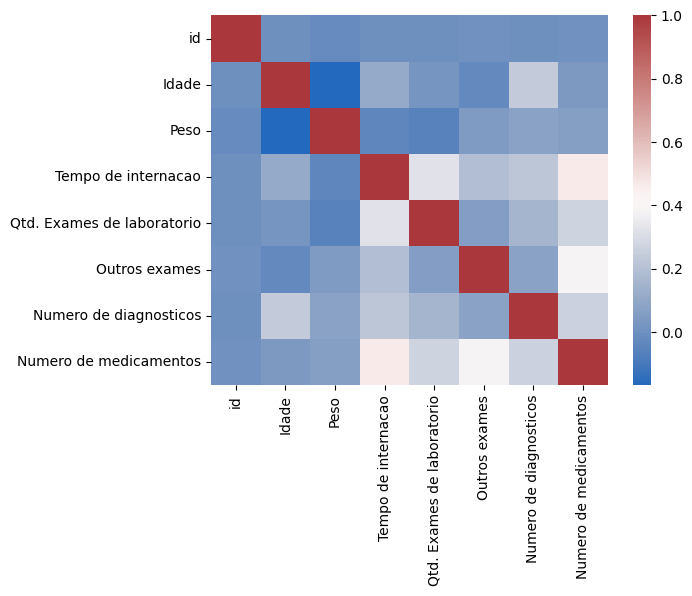

In [10]:
sns.heatmap(data.corr(), cmap=sns.color_palette("vlag", as_cmap=True))
warnings.simplefilter(action='ignore', category=FutureWarning)

In [35]:
class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None) :
        return self

    def transform(self, X):
  
        def transform_prescrition(data, column_name):
            return data[column_name].replace(['Nao prescrito', 'Dose reduzida', 'Dose mantida', 'Dose aumentada'],[0,1,2,3])

        X['Medicamento 1'] = transform_prescrition(data, 'Medicamento 1')
        X['Medicamento 2'] = transform_prescrition(data, 'Medicamento 2')
        X['Medicamento 3'] = transform_prescrition(data, 'Medicamento 3')
        X['Medicamento 4'] = transform_prescrition(data, 'Medicamento 4')
        X['Medicamento 5'] = transform_prescrition(data, 'Medicamento 5')
        X['Medicamento 6'] = transform_prescrition(data, 'Medicamento 6')
        X['Medicamento 7'] = transform_prescrition(data, 'Medicamento 7')
        X['Medicamento 8'] = transform_prescrition(data, 'Medicamento 8')
        X['Medicamento 9'] = transform_prescrition(data, 'Medicamento 9')
        X['Medicamento 10'] = transform_prescrition(data, 'Medicamento 10')
        X['Medicamento 11'] = transform_prescrition(data, 'Medicamento 11')
        X['Medicamento 12'] = transform_prescrition(data, 'Medicamento 12')
        X['Medicamento 13'] = transform_prescrition(data, 'Medicamento 13')
        X['Medicamento 14'] = transform_prescrition(data, 'Medicamento 14')
        X['Medicamento 15'] = transform_prescrition(data, 'Medicamento 15')
        X['Medicamento 16'] = transform_prescrition(data, 'Medicamento 16')
        X['Medicamento 17'] = transform_prescrition(data, 'Medicamento 17')
        X['Medicamento 18'] = transform_prescrition(data, 'Medicamento 18')
        X['Medicamento 19'] = transform_prescrition(data, 'Medicamento 19')
        X['Medicamento 20'] = transform_prescrition(data, 'Medicamento 20')
        X['Medicamento 21'] = transform_prescrition(data, 'Medicamento 21')
        X['Medicamento 22'] = transform_prescrition(data, 'Medicamento 22')
        X['Medicamento 23'] = transform_prescrition(data, 'Medicamento 23')
        
        matrix = encoder.fit_transform(X[['CategoricalFare']]).toarray()
        column_names = ["Fare_Cat_1", "Fare_Cat_2", "Fare_Cat_3", "Fare_Cat_4"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['CategoricalFare']]).toarray()
        column_names = ["Fare_Cat_1", "Fare_Cat_2", "Fare_Cat_3", "Fare_Cat_4"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['CategoricalFare']]).toarray()
        column_names = ["Fare_Cat_1", "Fare_Cat_2", "Fare_Cat_3", "Fare_Cat_4"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        X['Readmissao'] = X['Readmissao'].replace(['Nao', '+30', '-30'],[0,1,2])
        
        return X

In [36]:
prep_pipeline = Pipeline([("feature_encoder",FeatureEncoder())])

In [37]:
manipulated_data = prep_pipeline.fit_transform(data)

In [38]:
manipulated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81412 entries, 0 to 81411
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          81412 non-null  int64  
 1   Genero                      81412 non-null  object 
 2   Idade                       81412 non-null  int64  
 3   Peso                        2581 non-null   float64
 4   Raca                        79590 non-null  object 
 5   Fonte de admisscao          75876 non-null  object 
 6   Admissao                    73344 non-null  object 
 7   Atendimento                 41435 non-null  object 
 8   Tempo de internacao         81412 non-null  int64  
 9   Alta hospitalar             78463 non-null  object 
 10  Qtd. Exames de laboratorio  81412 non-null  int64  
 11  Outros exames               81412 non-null  int64  
 12  Numero de diagnosticos      81412 non-null  int64  
 13  Diagnostico 1 (id)          813

In [39]:
manipulated_data.describe()

,id,Idade,Peso,Tempo de internacao,Qtd. Exames de laboratorio,Outros exames,Numero de diagnosticos,Numero de medicamentos,Medicamento 1,Medicamento 2,...,Medicamento 15,Medicamento 16,Medicamento 17,Medicamento 18,Medicamento 19,Medicamento 20,Medicamento 21,Medicamento 22,Medicamento 23,Readmissao
count,81412.000000,81412.000000,2581.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.0,...,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000,81412.000000
mean,50937.439284,60.978725,73.760170,4.390692,43.103437,1.339631,7.421056,16.014543,0.001793,0.0,...,0.030905,1.056245,0.101828,0.013745,0.000270,0.000025,0.013892,0.000049,0.000025,0.571304
std,29412.013875,15.927826,25.958618,2.980581,19.670371,1.705142,1.933478,8.126308,0.061682,0.0,...,0.252446,1.099777,0.447813,0.165713,0.023246,0.007009,0.167983,0.009913,0.007009,0.683429
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25460.500000,50.000000,50.000000,2.000000,31.000000,0.000000,6.000000,10.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50963.000000,60.000000,75.000000,4.000000,44.000000,1.000000,8.000000,15.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76423.250000,70.000000,100.000000,6.000000,57.000000,2.000000,9.000000,20.000000,0.000000,0.0,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,101765.000000,90.000000,200.000000,14.000000,132.000000,6.000000,16.000000,81.000000,3.000000,0.0,...,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000


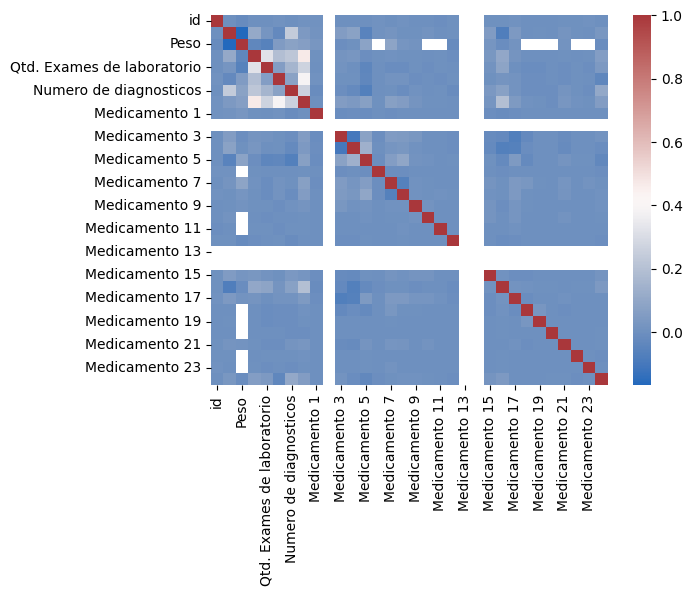

In [40]:
sns.heatmap(data.corr(), cmap=sns.color_palette("vlag", as_cmap=True))
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
pca_model = PCA(n_components=2)

pca_feat = StandardScaler().fit_transform(manipulated_data)
pc_data = pca_model.fit_transform(pca_feat)

transformed = pd.DataFrame(data = pc_data, columns = ['PC1', 'PC2'])
plot = transformed.plot.scatter(x ='PC1', y='PC2',c=manipulated_data["Survived"],colormap='bwr')

ValueError: could not convert string to float: 'Masculino'